<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [3]:
covid = pd.read_csv(datadir + "20200411.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid['denominazione_regione'] = covid['denominazione_regione'].str.replace('-',' ')
covid

date stato  codice_regione  ... tamponi  note_it  note_en
0     2020-02-24T18:00:00   ITA              13  ...       5      NaN      NaN
1     2020-02-24T18:00:00   ITA              17  ...       0      NaN      NaN
2     2020-02-24T18:00:00   ITA               4  ...       1      NaN      NaN
3     2020-02-24T18:00:00   ITA              18  ...       1      NaN      NaN
4     2020-02-24T18:00:00   ITA              15  ...      10      NaN      NaN
...                   ...   ...             ...  ...     ...      ...      ...
1003  2020-04-11T17:00:00   ITA               9  ...   75756      NaN      NaN
1004  2020-04-11T17:00:00   ITA               4  ...   16646      NaN      NaN
1005  2020-04-11T17:00:00   ITA              10  ...   17661      NaN      NaN
1006  2020-04-11T17:00:00   ITA               2  ...    3464      NaN      NaN
1007  2020-04-11T17:00:00   ITA               5  ...  190912      NaN      NaN

[1008 rows x 19 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [4]:
italy_currently_positive = covid.pivot_table('totale_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_new_positive = covid.pivot_table('nuovi_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_new_positive = italy_new_positive.fillna(method='ffill')
italy_new_positive = italy_new_positive.fillna(0)
italy_new_positive = italy_new_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_new_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_hospitalized = covid.pivot_table('totale_ospedalizzati', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_hospitalized = italy_hospitalized.fillna(method='ffill')
italy_hospitalized = italy_hospitalized.fillna(0)
italy_hospitalized = italy_hospitalized.iloc[:-1] 
italy_hospitalized.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_recovered = covid.pivot_table('dimessi_guariti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_recovered = italy_recovered.fillna(method='ffill')
italy_recovered = italy_recovered.fillna(0)
italy_recovered = italy_recovered.iloc[:-1] 
italy_recovered.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...      32     221
2020-02-25T18:00:00          0           0  ...      42     311
2020-02-26T18:00:00          0           0  ...      69     385
2020-02-27T18:00:00          1           0  ...     109     588
2020-02-28T18:00:00          1           0  ...     149     821
2020-02-29T17:00:00          2           0  ...     189    1049
2020-03-01T17:00:00          5           0  ...     261    1577
2020-03-02T18:00:00          5           0  ...     271    1835
2020-03-03T18:00:00          6           1  ...     297    2263
2020-03-04T17:00:00          7           1  ...     345    2706
2020-03-05T17:00:00          8           1  ...     380    3296
2020-03-06T17:00:00          9           3  ...     454    3916
2020-03-07T18:00:00         11           3  ...     505    5061
2020-03-08T18:00:00         17           4  ...     623    6387
2020-03-09T18:00:00         30           5  ...     694    7985
2020-03-10T18:00:00         37           7  ...     783    8514
2020-03-11T17:00:00         37           8  ...     940   10590
2020-03-12T17:00:00         78           8  ...    1297   12839
2020-03-13T17:00:00         83          10  ...    1453   14955
2020-03-14T17:00:00        106          10  ...    1775   17750
2020-03-15T17:00:00        128          11  ...    1989   20603
2020-03-16T17:00:00        165          12  ...    2274   23073
2020-03-17T17:00:00        216          20  ...    2488   26062
2020-03-18T17:00:00        249          27  ...    2953   28710
2020-03-19T17:00:00        366          37  ...    3169   33190
2020-03-20T17:00:00        422          52  ...    3677   37860
2020-03-21T17:00:00        494          66  ...    4214   42681
2020-03-22T17:00:00        539          81  ...    4644   46638
2020-03-23T17:00:00        605          89  ...    4986   50418
2020-03-24T17:00:00        622          91  ...    5351   54030
2020-03-25T17:00:00        738         112  ...    5745   57521
2020-03-26T17:00:00        860         133  ...    6140   62013
2020-03-27T17:00:00        925         147  ...    6648   66414
2020-03-28T17:00:00       1027         178  ...    6913   70065
2020-03-29T17:00:00       1169         197  ...    7251   73880
2020-03-30T17:00:00       1169         208  ...    7564   75528
2020-03-31T17:00:00       1191         216  ...    7850   77635
2020-04-01T17:00:00       1211         225  ...    8224   80572
2020-04-02T17:00:00       1251         233  ...    8578   83049
2020-04-03T17:00:00       1301         247  ...    8861   85388
2020-04-04T17:00:00       1356         244  ...    9093   88274
2020-04-05T17:00:00       1420         254  ...    9409   91246
2020-04-06T17:00:00       1425         262  ...    9722   93187
2020-04-07T17:00:00       1491         265  ...    9965   94067
2020-04-08T17:00:00       1534         270  ...   10171   95262
2020-04-09T17:00:00       1566         275  ...   10449   96877
2020-04-10T17:00:00       1635         279  ...   10647   98273
2020-04-11T17:00:00       1724         281  ...   10749  100269

[48 rows x 22 columns]

Nella seguente grafica viene rappresentata la dinamica temporale degli attualmente positivi, quindi il totale dei positivi (compresi i nuovo positivi) meno i deceduti ed i guariti, regione per regione, evidenziando i deceduti con un colore più scuro

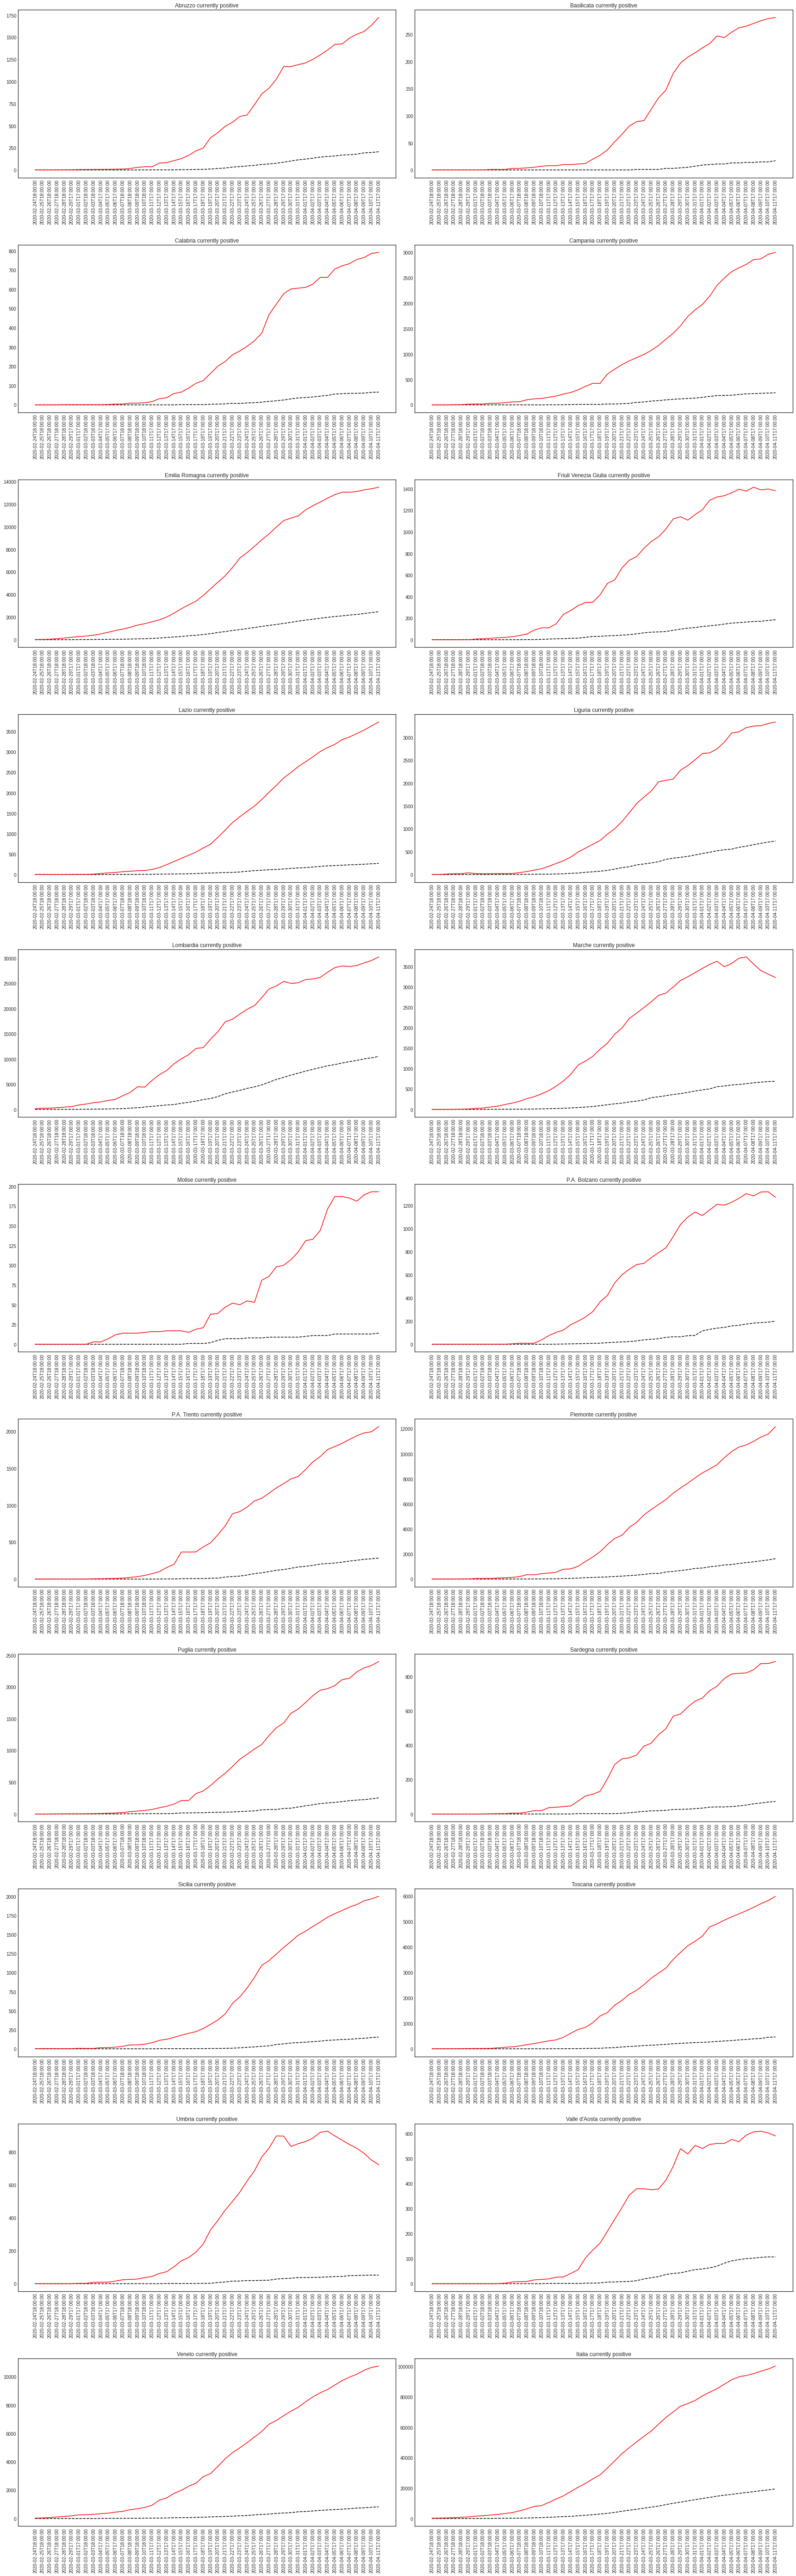

In [5]:
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    ax.plot(region_dead.index, region_dead.Dead, '--k')
    ax.plot(region_positive.index, region_positive['Positive'], '-r')
    ax.set_title(region + ' currently positive')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


Il numero di positivi assoluto è ancora in aumento ovunque tranne poche regioni, Umbria in primis
 
Segue una comparazione tra regioni relativa al numero di attualmente positivi

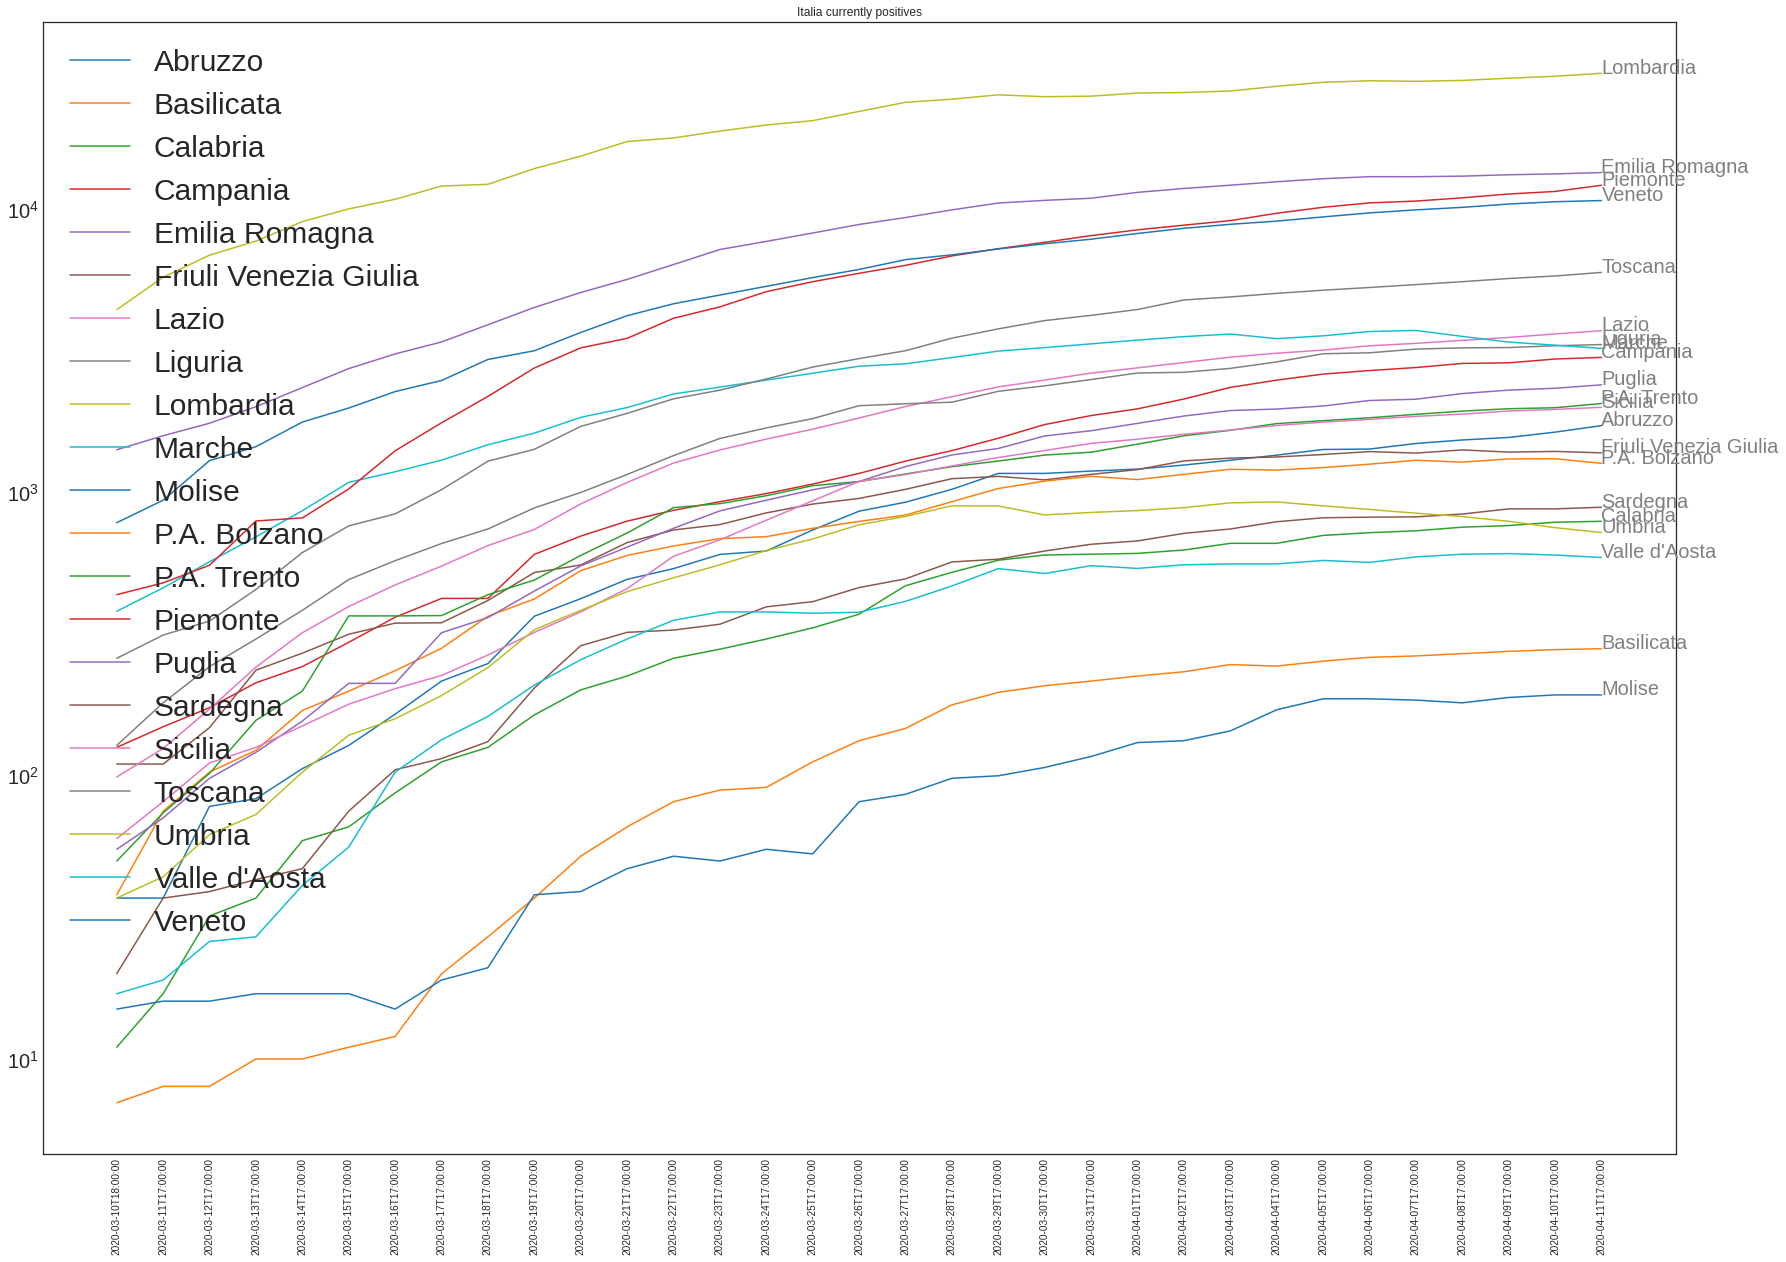

In [6]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 15
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    if (region != 'Italia'):
        region_positive = italy_currently_positive[[region]]
        region_positive = region_positive[first_interesting:]
        region_positive.columns = ['Positive']
        ax.plot(region_positive.index, region_positive['Positive'], label=region)
        ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive.loc[last_day, 'Positive'], region, **style)

ax.set_title(region + ' currently positives')
ax.set_xticklabels(region_positive.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Normalizziamo i dati rispetto alla popolazione di ogni regione

In [0]:
 #source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580},
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869},
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131},
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692},
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477},
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220},
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082},
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640},
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574},
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271},
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617},
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406},
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053},
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591},
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891},
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641},
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015},
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666},
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}
            ])

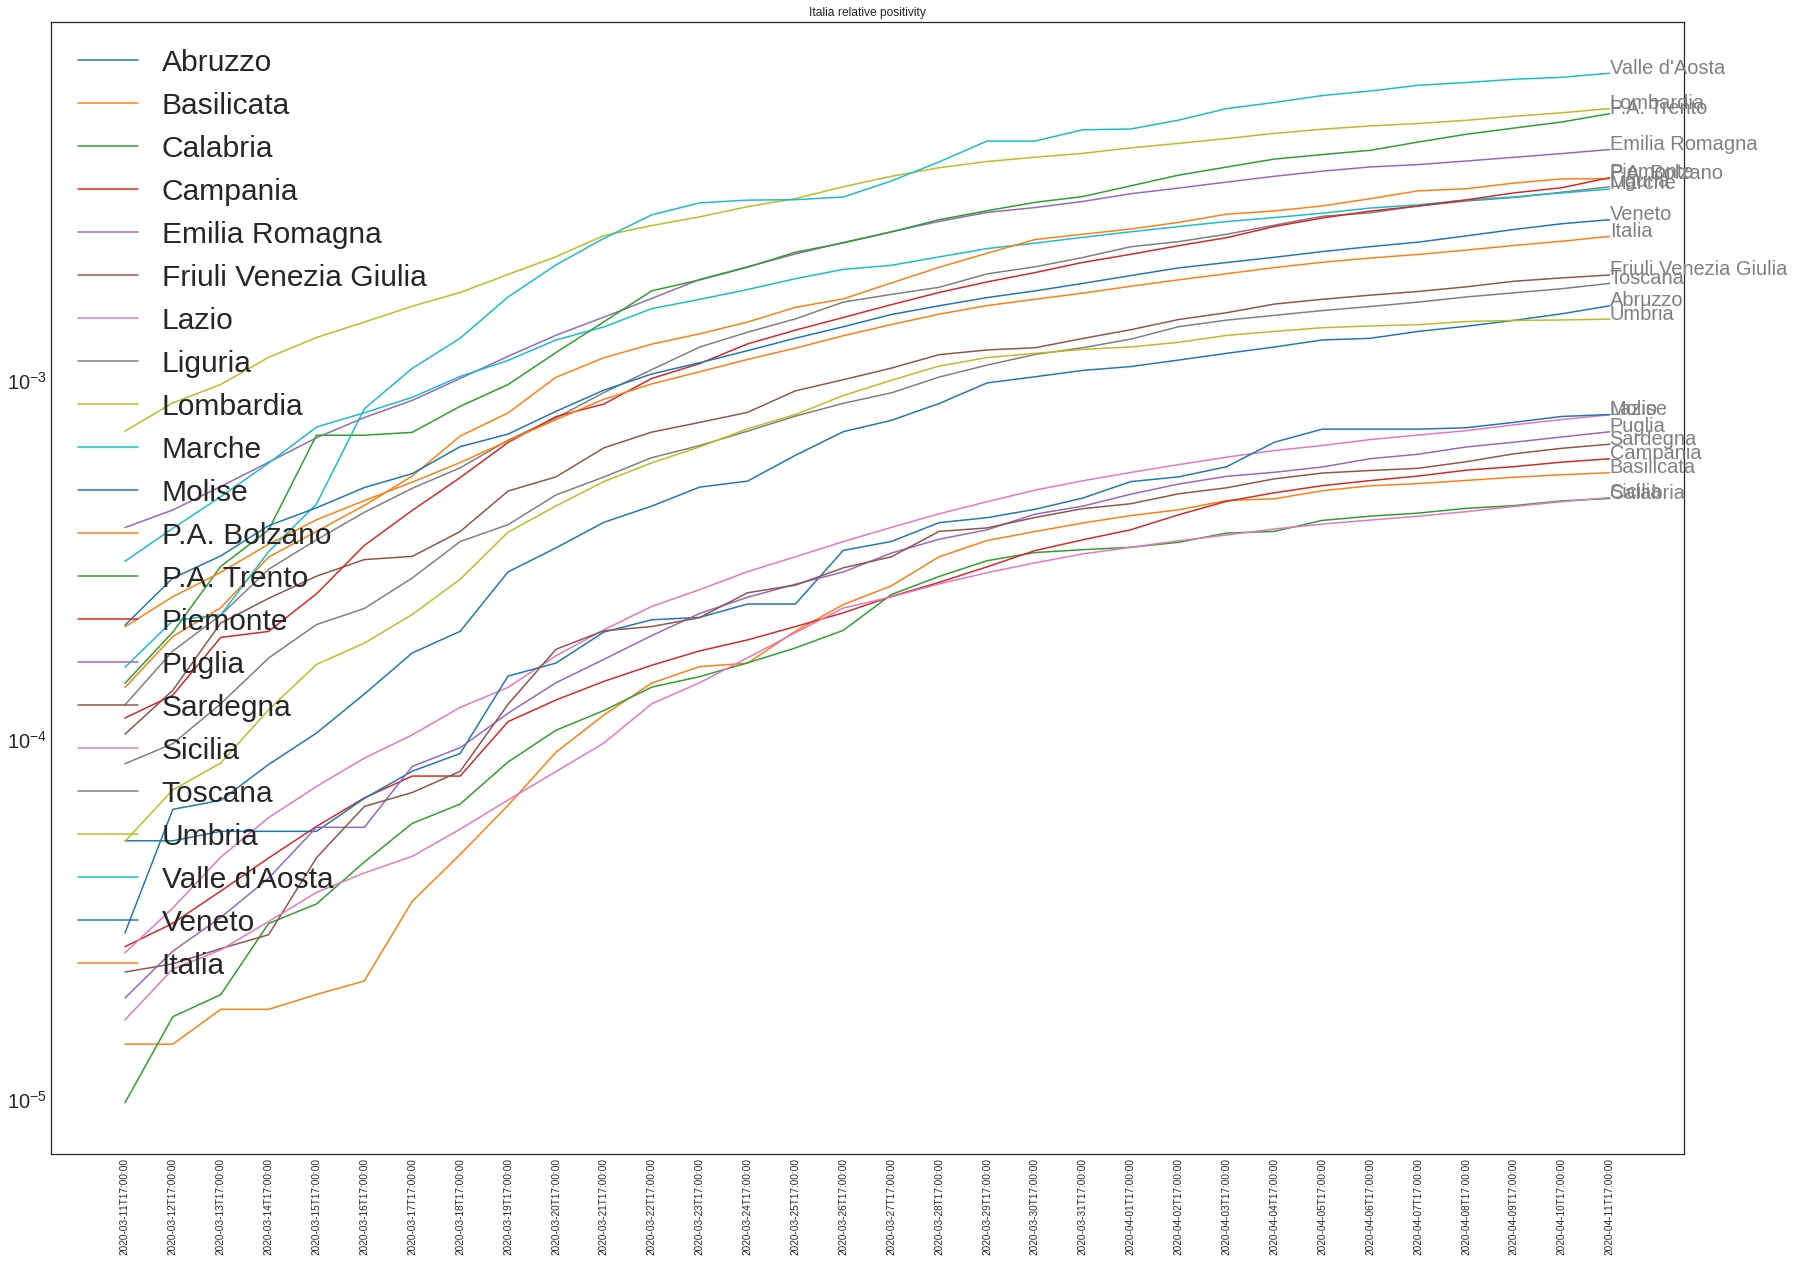

In [8]:
style = dict(size=20, color='gray')
columns = list(italy_total_positive)
last_day = covid['date'].max()
italy_total_positive_normalized = italy_total_positive.copy()
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_relative_positivity = italy_total_positive[region]/population_pivot.loc['population', region]
    region_relative_positivity = region_relative_positivity[first_interesting:]
    ax.plot(region_relative_positivity.index, region_relative_positivity, label=region)
    ax.text(italy_total_positive.shape[0]-first_interesting-1, region_relative_positivity.loc[last_day], region, **style)
    i=i+1

ax.set_title(region + ' relative positivity')
ax.set_xticklabels(region_relative_positivity.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})

Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


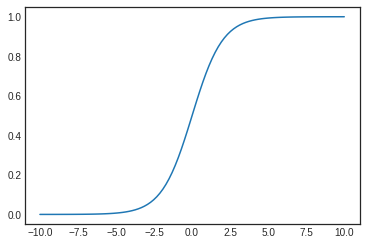

In [9]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... ci si aspetta che quella degli attualmente positivi raggiunga un picco per poi quindi scendere, magari con una discesa più lenta rispetto alla salita, ed infine tendere a zero: 

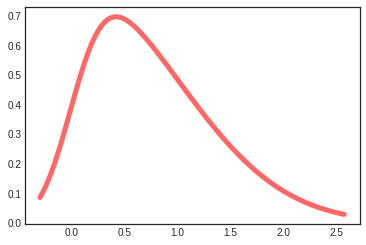

In [10]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

Vediamo allora l'andamento regione per regione di velocità (i nuovi contagi) ed accelerazione del numero dei positivi correnti (media mobile a tre giorni)

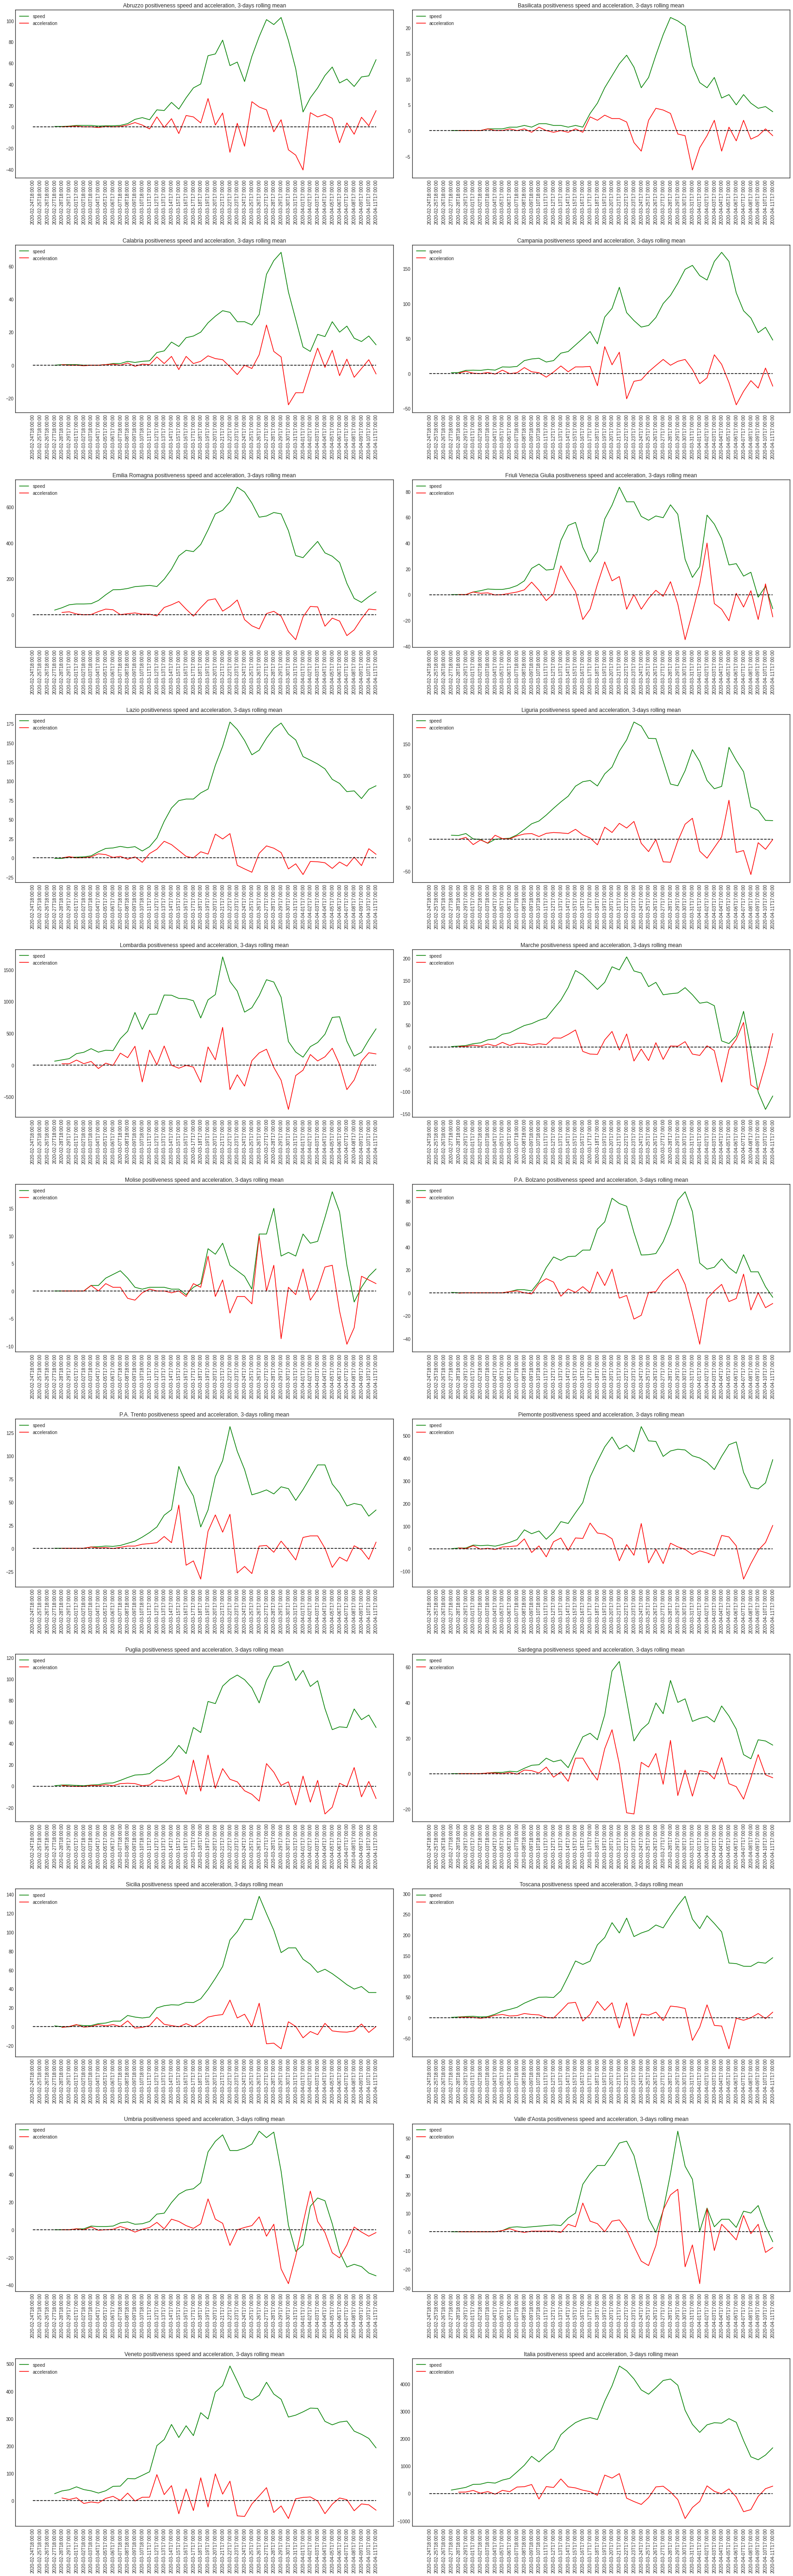

In [11]:
columns = list(italy_currently_positive)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff(), '-g', label='speed')
    ax.set_title(region + ' currently positive delta')
    ax.set_xticklabels(region_positive.index,rotation=90)
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff().diff(), '-r', label='acceleration')
    ax.plot(region_positive.index, np.zeros(region_positive.index.size), '--k')
    ax.set_title(region + ' positiveness speed and acceleration, 3-days rolling mean')
    ax.set_xticklabels(region_positive.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


Ciò che interessa maggiormente ai fini predittivi è la data e l'intensità del picco degli attualmente positivi. Se fosse possibile stimare queste due quantità il Sistema Sanitario Regionale potrebbe organizzarsi.


**Il picco si configura nel momento in cui la velocità toccherà lo zero senza più aumentare**.

L'Umbria è la prima regione in cui il numero assoluto di contagiati diminuisce

Grazie al lockdown il picco effettivo è stato più basso e più lontano nel tempo rispetto a quello che si sarebbe verificato senza interventi, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Segue una comparazione tra regioni relativa al numero di deceduti, anch'essa rapportata alla popolazione

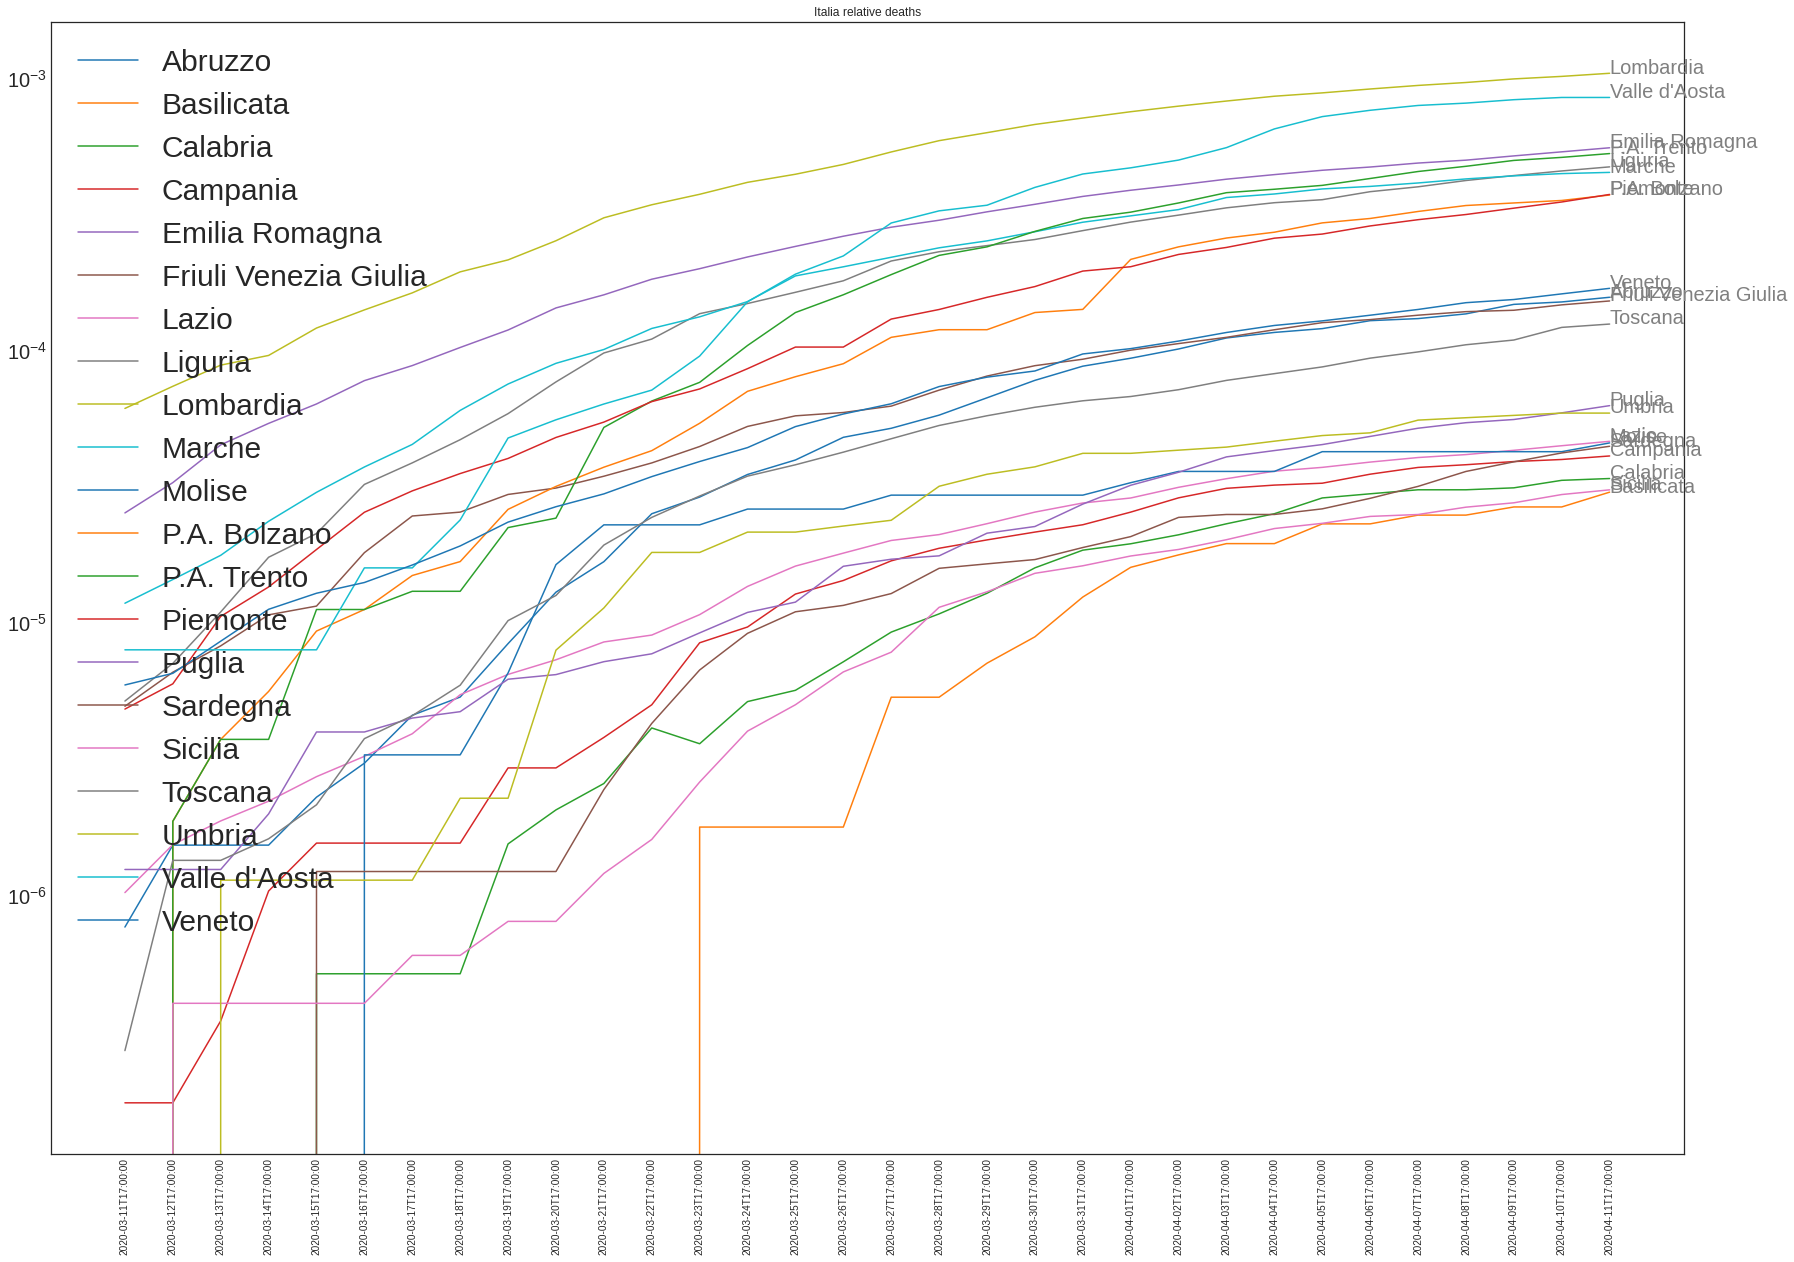

In [12]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_dead = italy_dead[[region]]/population_pivot.loc['population', region]
        region_dead = region_dead[first_interesting:]
        region_dead.columns = ['Dead']
        ax.plot(region_dead.index, region_dead['Dead'], label=region)
        ax.text(italy_dead.shape[0]-first_interesting-1, region_dead.loc[last_day, 'Dead'], region, **style)
        i=i+1

ax.set_title(region + ' relative deaths')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})



Nella seguente grafica viene rappresentata l'istantanea del rapporto tra deceduti e totali positivi su tutte le regioni, giorno per giorno, con media mobile a 3 giorni


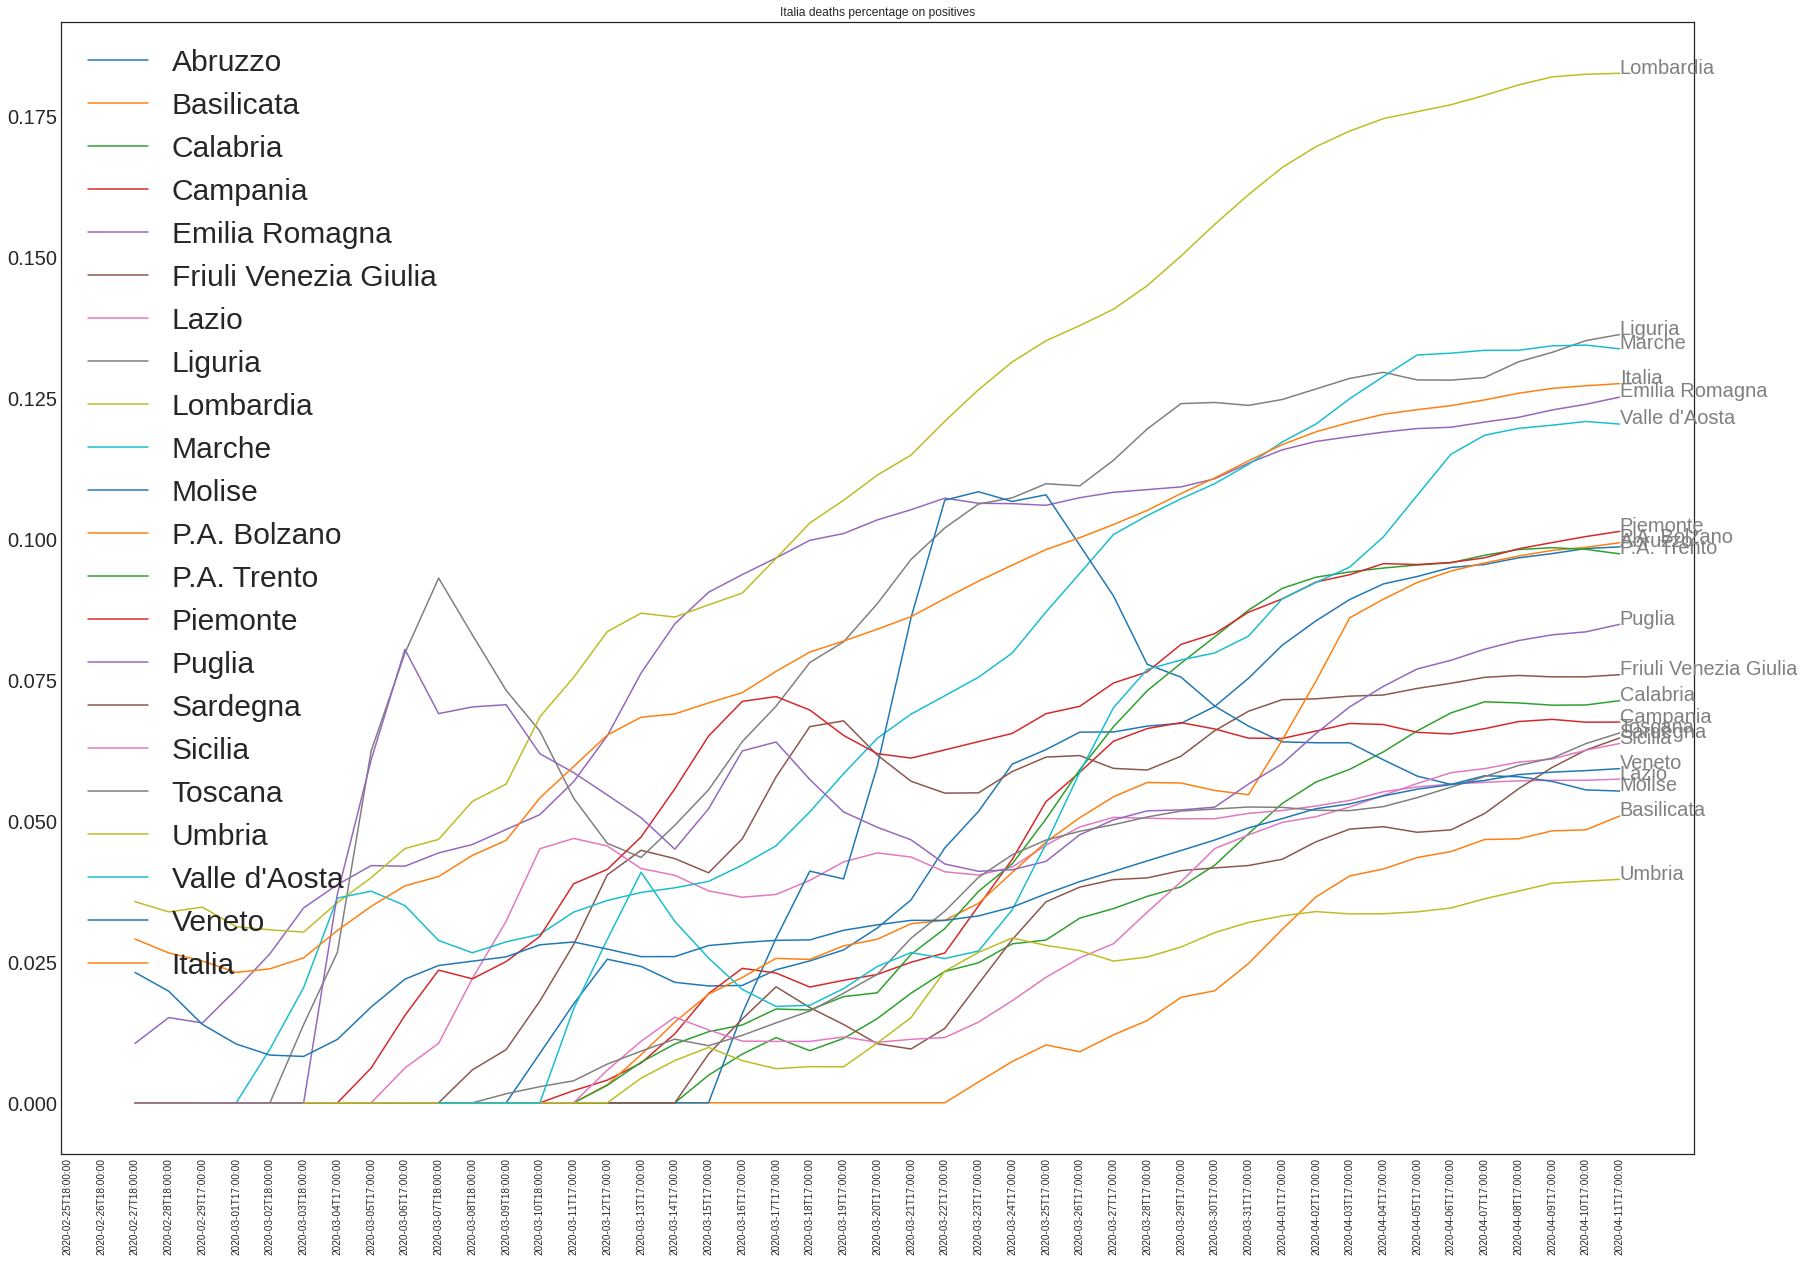

In [13]:
italy_dead_vs_total = italy_dead/italy_total_positive
style = dict(size=20, color='gray')
columns = list(italy_dead_vs_total)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_dead = italy_dead_vs_total[[region]]
    region_dead = region_dead[first_interesting:]
    region_dead.columns = ['Dead_percentage']
    ax.plot(region_dead.index, region_dead['Dead_percentage'].rolling(window=3).mean(), label=region)
    ax.text(italy_dead_vs_total.shape[0]-first_interesting-1, region_dead.rolling(window=3).mean().loc[last_day, 'Dead_percentage'], region, **style)
    i=i+1

ax.set_title(region + ' deaths percentage on positives')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})


La Lombardia è di gran lunga la regione dove il Coronavisu ha ucciso di più. Anche Liguria e Marche sopra la media nazionale.

Si ravvisano differenze anche di un ordine di grandezza tra Umbria (la regione meno "letale") e la Lombardia


Ma l'analisi più interessante potrebbe provenire dal rapporto tra numero di attualmente positivi e numero di tamponi effettuati, dato più realistico in quanto il numero di casi testati è la "popolazione" di riferimento. Un numero o un incremento anomalo del numero di positivi in una regione può essere dovuto ad un aumento dei test eseguiti

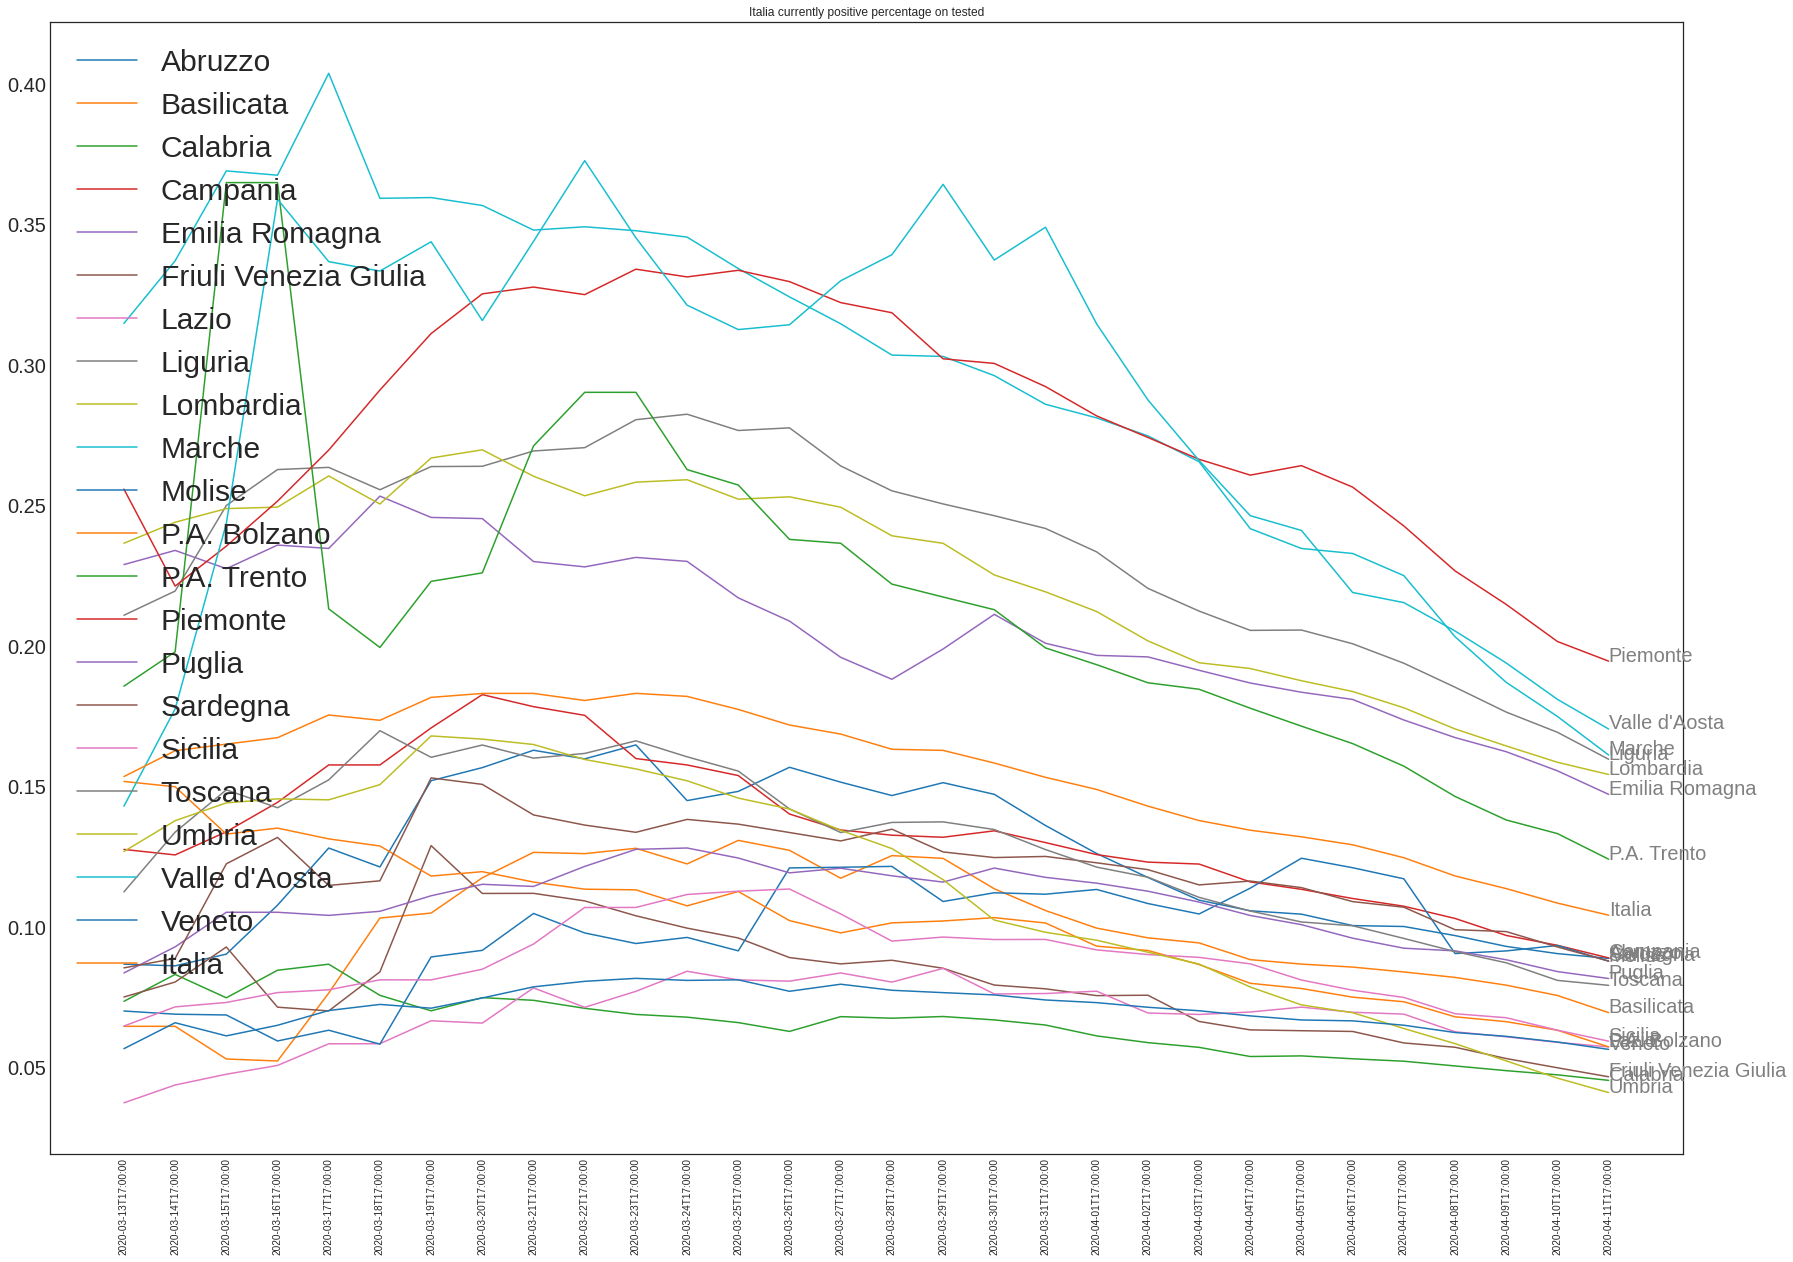

In [14]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 18
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested, label=region)
    ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive_vs_tested.loc[last_day], region, **style)

ax.set_title(region + ' currently positive percentage on tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Considerando quindi il numero di test eseguiti il picco sembra stato globalmente superato il 24/3. In seguito lento calo generalizzato.

Vediamo la dinamica del fenomeno con una media mobile a 4 giorni, dal momento che i dati grezzi mostrano un'oscillazione con periodo giornaliero.

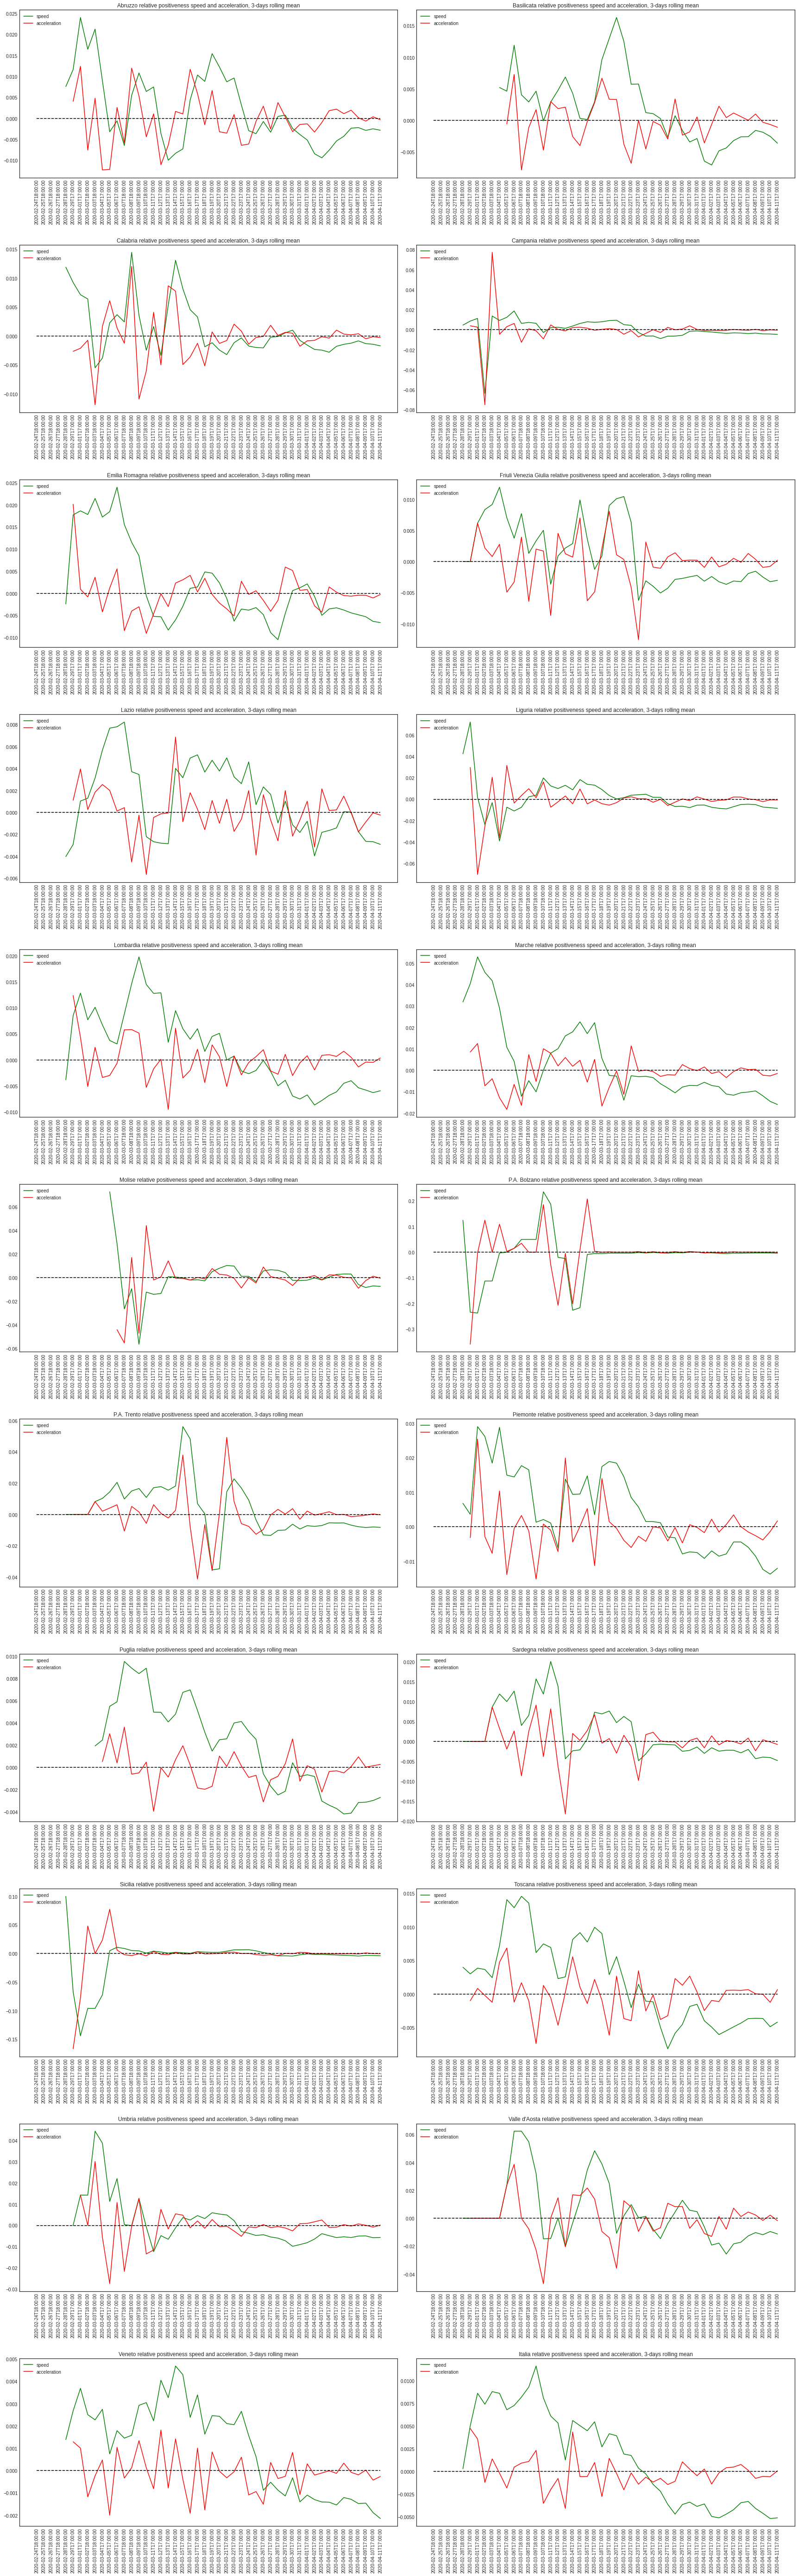

In [15]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested.columns = ['Positive']
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff(), '-g', label='speed')
    ax.set_title(region + ' currently positive delta')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff().diff(), '-r', label='acceleration')
    ax.plot(region_positive_vs_tested.index, np.zeros(region_positive_vs_tested.index.size), '--k')
    ax.set_title(region + ' relative positiveness speed and acceleration, 3-days rolling mean')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


L'allarme odierno relativo alla Lombardia non sembra, alla luce del numero di test eseguiti, particolarmente preoccupante: la velocità di diminuzione dei positivi relativi è costante

Globalmente il numero di positivi ha inizato a scendere il 24/3 proseguendo un trend in atto già dal 20/3 ma che il 28/3 si è interrotto stabilizzandosi improvvisamente ed anzi invertendo la rotta da 4 giorni a questa parte.

In [16]:
italy_tested['Liguria'].diff().loc[last_day]

1374.0

In [17]:
italy_new_positive['Liguria'].loc[last_day]

185

Studiamo il caso del Veneto e generalizziamolo

In [18]:
veneto_positive_vs_tested = italy_new_positive['Veneto']/italy_tested['Veneto'].diff()
veneto_positive_vs_tested.rolling(window=5).mean()

date
2020-02-24T18:00:00         NaN
2020-02-25T18:00:00         NaN
2020-02-26T18:00:00         NaN
2020-02-27T18:00:00         NaN
2020-02-28T18:00:00         NaN
2020-02-29T17:00:00    0.025421
2020-03-01T17:00:00    0.060427
2020-03-02T18:00:00    0.058182
2020-03-03T18:00:00    0.069111
2020-03-04T17:00:00    0.093980
2020-03-05T17:00:00    0.094109
2020-03-06T17:00:00    0.072921
2020-03-07T18:00:00    0.077990
2020-03-08T18:00:00    0.077789
2020-03-09T18:00:00    0.435995
2020-03-10T18:00:00    0.462045
2020-03-11T17:00:00    0.453982
2020-03-12T17:00:00    0.481586
2020-03-13T17:00:00    0.483258
2020-03-14T17:00:00    0.146849
2020-03-15T17:00:00    0.122687
2020-03-16T17:00:00    0.139688
2020-03-17T17:00:00    0.212712
2020-03-18T17:00:00    0.213001
2020-03-19T17:00:00    0.174084
2020-03-20T17:00:00    0.189268
2020-03-21T17:00:00    0.192163
2020-03-22T17:00:00    0.108781
2020-03-23T17:00:00    0.112003
2020-03-24T17:00:00    0.115356
2020-03-25T17:00:00    0.112753
202

In [19]:
italy_tested['Veneto']

date
2020-02-24T18:00:00      2200
2020-02-25T18:00:00      3780
2020-02-26T18:00:00      4900
2020-02-27T18:00:00      6164
2020-02-28T18:00:00      7414
2020-02-29T17:00:00      8659
2020-03-01T17:00:00      9056
2020-03-02T18:00:00      9782
2020-03-03T18:00:00     10176
2020-03-04T17:00:00     10515
2020-03-05T17:00:00     11949
2020-03-06T17:00:00     13023
2020-03-07T18:00:00     14429
2020-03-08T18:00:00     15918
2020-03-09T18:00:00     15956
2020-03-10T18:00:00     16643
2020-03-11T17:00:00     21400
2020-03-12T17:00:00     23438
2020-03-13T17:00:00     25691
2020-03-14T17:00:00     26980
2020-03-15T17:00:00     32546
2020-03-16T17:00:00     35052
2020-03-17T17:00:00     35478
2020-03-18T17:00:00     40841
2020-03-19T17:00:00     44658
2020-03-20T17:00:00     49288
2020-03-21T17:00:00     53642
2020-03-22T17:00:00     57671
2020-03-23T17:00:00     61115
2020-03-24T17:00:00     66178
2020-03-25T17:00:00     70877
2020-03-26T17:00:00     79759
2020-03-27T17:00:00     83627
2020-

[L'esperimento di Vò Euganeo](https://mattinopadova.gelocal.it/regione/2020/03/07/news/coronavirus-i-risultati-dei-2778-tamponi-a-vo-positivo-il-2-5-1.38563019) ha rilevato che su 2778 tamponi eseguiti a tappeto sulla popolazione del comune, in massima parte eseguiti tra il 25 ed il 29 febbraio, il 2,5% è risultato positivo. 

In tutto il Veneto, fino al giorno 29/2, sono stati totalmente eseguiti 8659 test (tolti quelli di Vò si tratta di test mirati e non a tappeto) e la percentuale di attualmente positivi (media mobile a 5 giorni) viene confermata al 2.5%.

Generalizzando questo esperimento, purtroppo isolato, si può sommariamente stimare che la percentuale di contagiati in Veneto all'ultima rilevazione sia del 5.9%, in calo.

Generalizzando ulteriormente, per l'ultima rilevazione e in una media mobile di 5 giorni, i dati sono quelli visualizzati nel precedente grafico e, nel dettaglio:

In [20]:
italy_positive_vs_tested = italy_new_positive/italy_tested.diff()
italy_positive_vs_tested.rolling(window=5).mean().loc[last_day]

denominazione_regione
Abruzzo                  0.078266
Basilicata               0.030410
Calabria                 0.026218
Campania                 0.051207
Emilia Romagna           0.108882
Friuli Venezia Giulia    0.040553
Lazio                    0.047923
Liguria                  0.155005
Lombardia                0.149997
Marche                   0.145621
Molise                        NaN
P.A. Bolzano             0.047628
P.A. Trento              0.120686
Piemonte                 0.142263
Puglia                   0.063280
Sardegna                 0.072545
Sicilia                  0.033836
Toscana                  0.043939
Umbria                   0.012541
Valle d'Aosta            0.116360
Veneto                   0.049383
Italia                   0.082411
Name: 2020-04-11T17:00:00, dtype: float64

In Italia, quindi, estendendo il caso Veneto, l'8.2% (due giorni fa era il 10%) della popolazione sarebbe contagiato (in Liguria, Lombardia, Marche e Piemonte più del 14%). Sembra un dato esagerato ma si segnala lo [studio dell'Imperial College](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Europe-estimates-and-NPI-impact-30-03-2020.pdf) secondo il quale la percentuale sarebbe, al 30 marzo, del 9.8%, quindi dello stesso ordine di grandezza.

[Altri studi](https://www.repubblica.it/cronaca/2020/04/06/news/coronavirus-253286203/?ref=RHPPLF-BH-I253289448-C8-P3-S1.8-T1) ipotizzano 5-6 milioni di contagiati, confermando quindi l'ordine di grandezza del 10%

Visti i dati cumulativi vediamo quelli istantanei

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


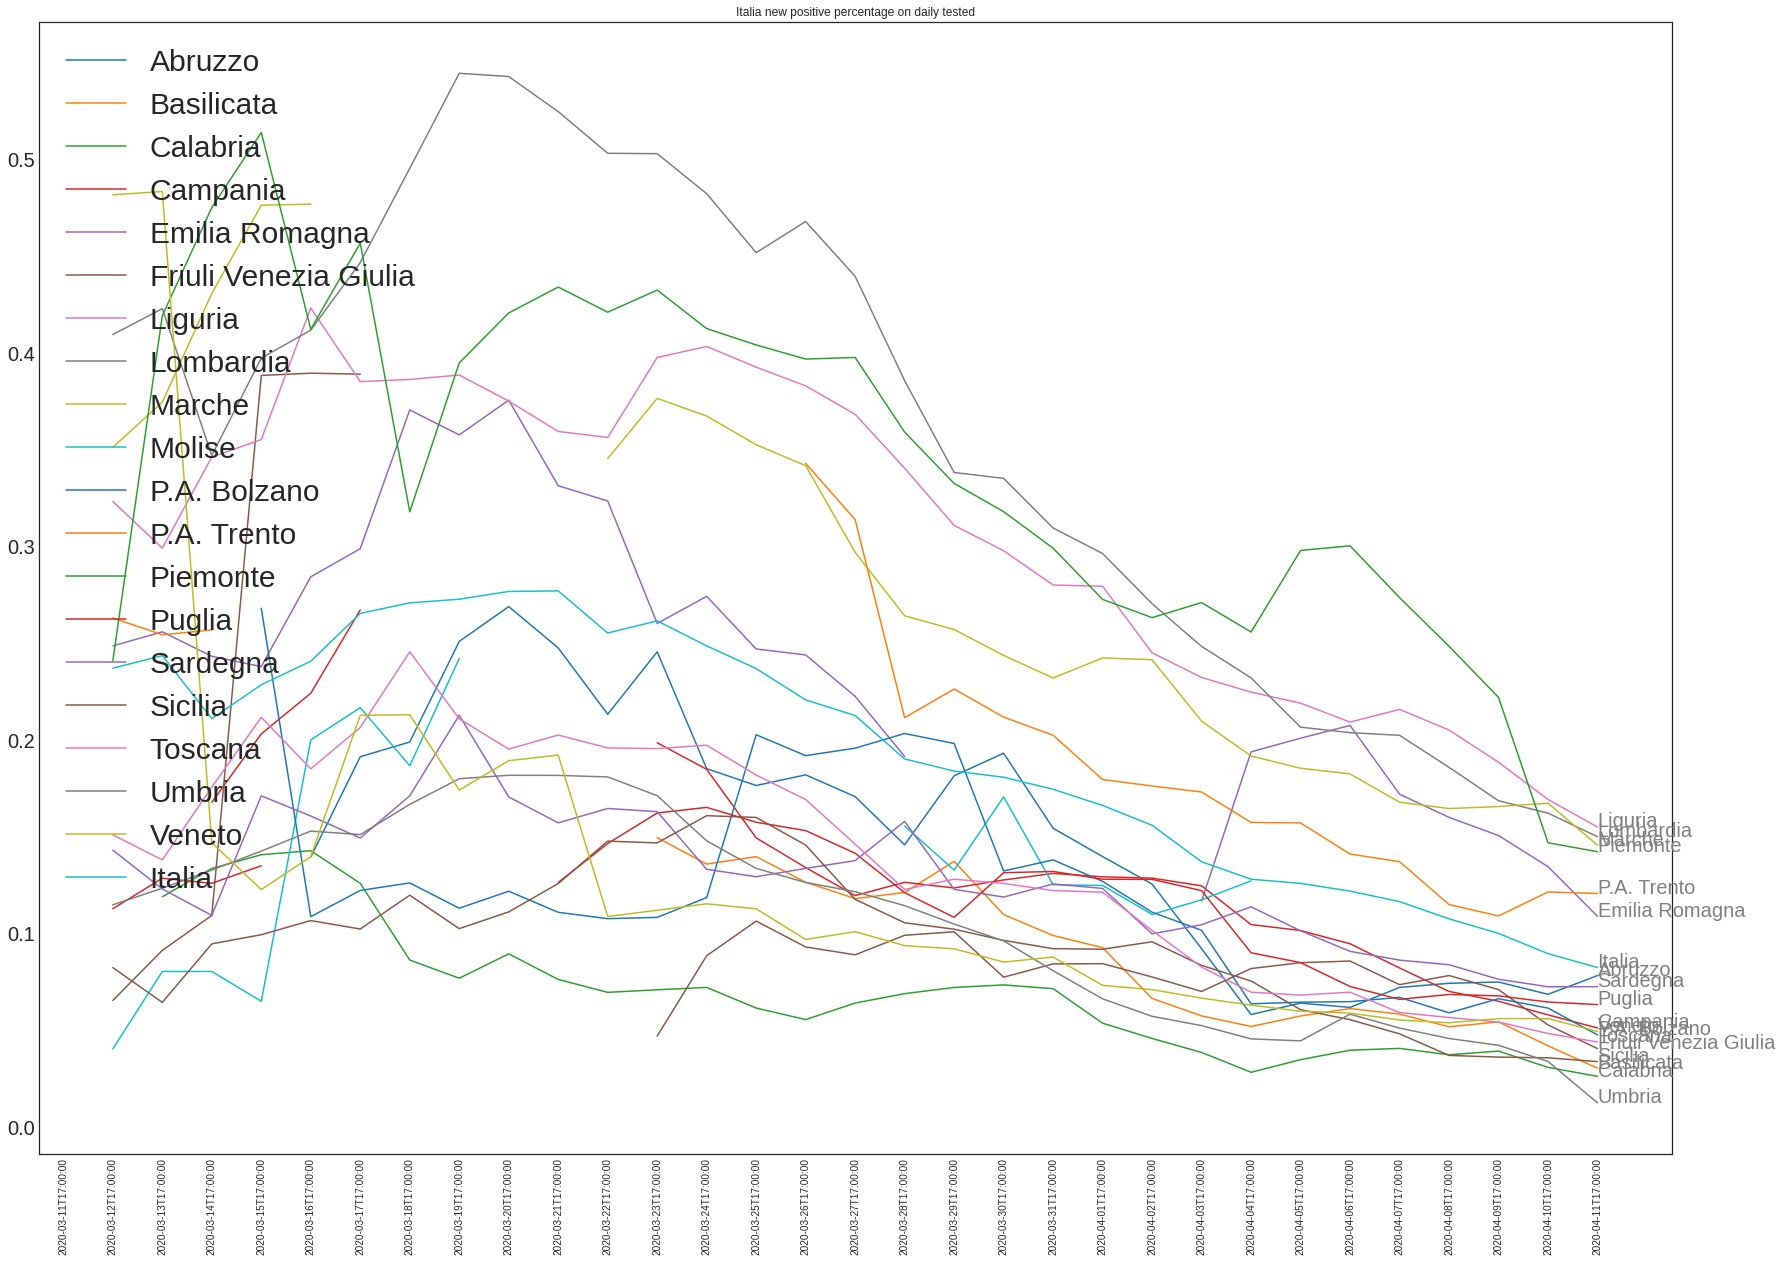

In [23]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 13
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
  if (region!='Valle d\'Aosta') and (region!='Lazio'):
        region_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
        region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
        ax.plot(region_positive_vs_tested.index, region_positive_vs_tested.rolling(window=5).mean(), label=region)
        ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.rolling(window=5).mean().loc[last_day], region, **style)

ax.set_title(region + ' new positive percentage on daily tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Oggi la Liguria è stata la regione col maggior numero di positivi in rapporto al numero di tamponi eseguiti.

Vediamo il dato splittato regione per regione, sia la media mobile a 5 giorni che il dato giornaliero effettivo

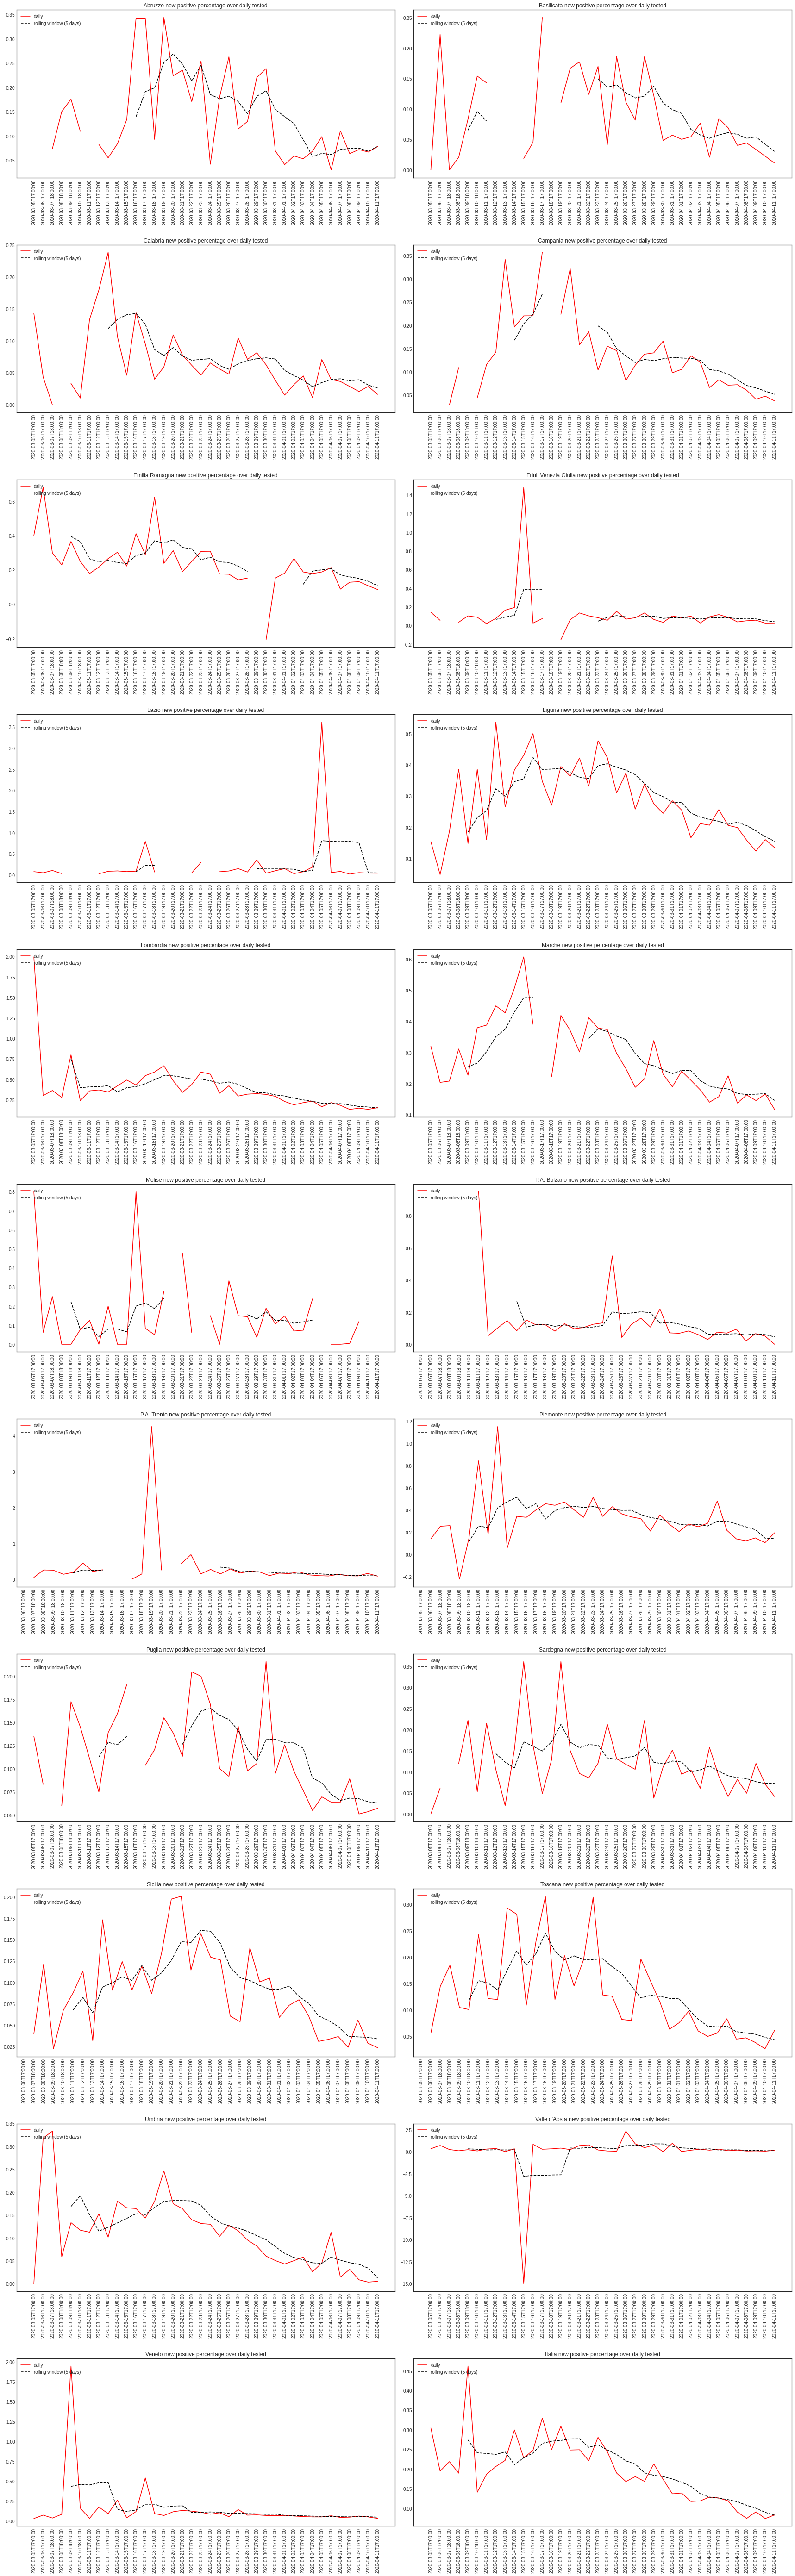

In [24]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_new_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
    region_new_positive_vs_tested.columns = ['Positive_perc']
    region_new_positive_vs_tested = region_new_positive_vs_tested[10:]
    ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'], '-r', label='daily')
    ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' new positive percentage over daily tested')
    ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


Lo zero per i nuovi contagi sembra raggiunto in Fiuli V.G., Lazio, Trentino Alto Adige, Valle d'Aosta, Veneto, Umbria

Diamo anche un'occhiata all'andamento dei test

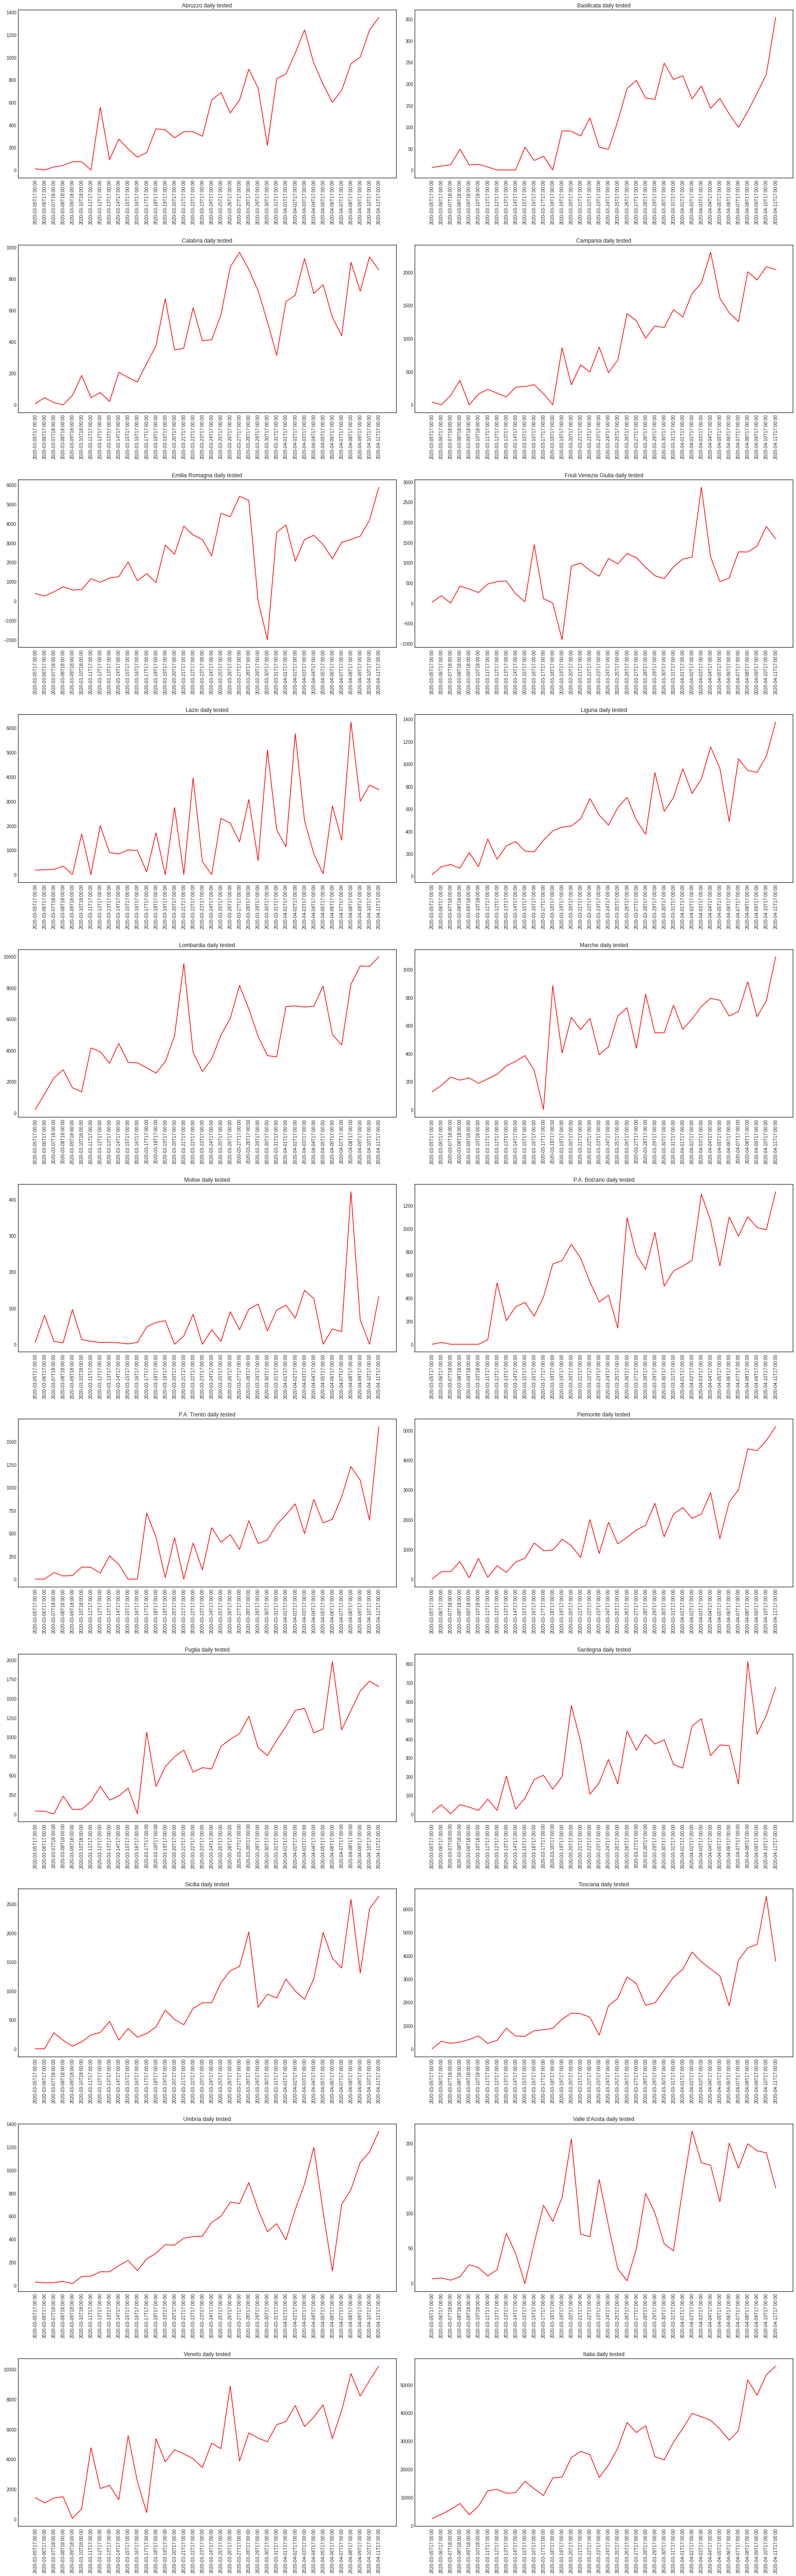

In [25]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_daily_tested = italy_tested[[region]].diff()
    region_daily_tested.columns = ['tested']
    region_daily_tested = region_daily_tested[10:]
    ax.plot(region_daily_tested.index, region_daily_tested['tested'], '-r', label='daily')
    ax.set_title(region + ' daily tested')
    ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    i=i+1


Si può vedere che l'aumento del numero di test è stato determinante nel far salire il numero di contagi registrati. Negli ultimi due giorni il numero di tamponi effettuato è cresciuto, sia in Lombardia che nel resto d'Italia e questo spiega l'aumento del numero di contagi odierno.

Vediamo infine la relazione tra positivi relativi (ossia rapportato al numero di test), ospedalizzati e deceduti

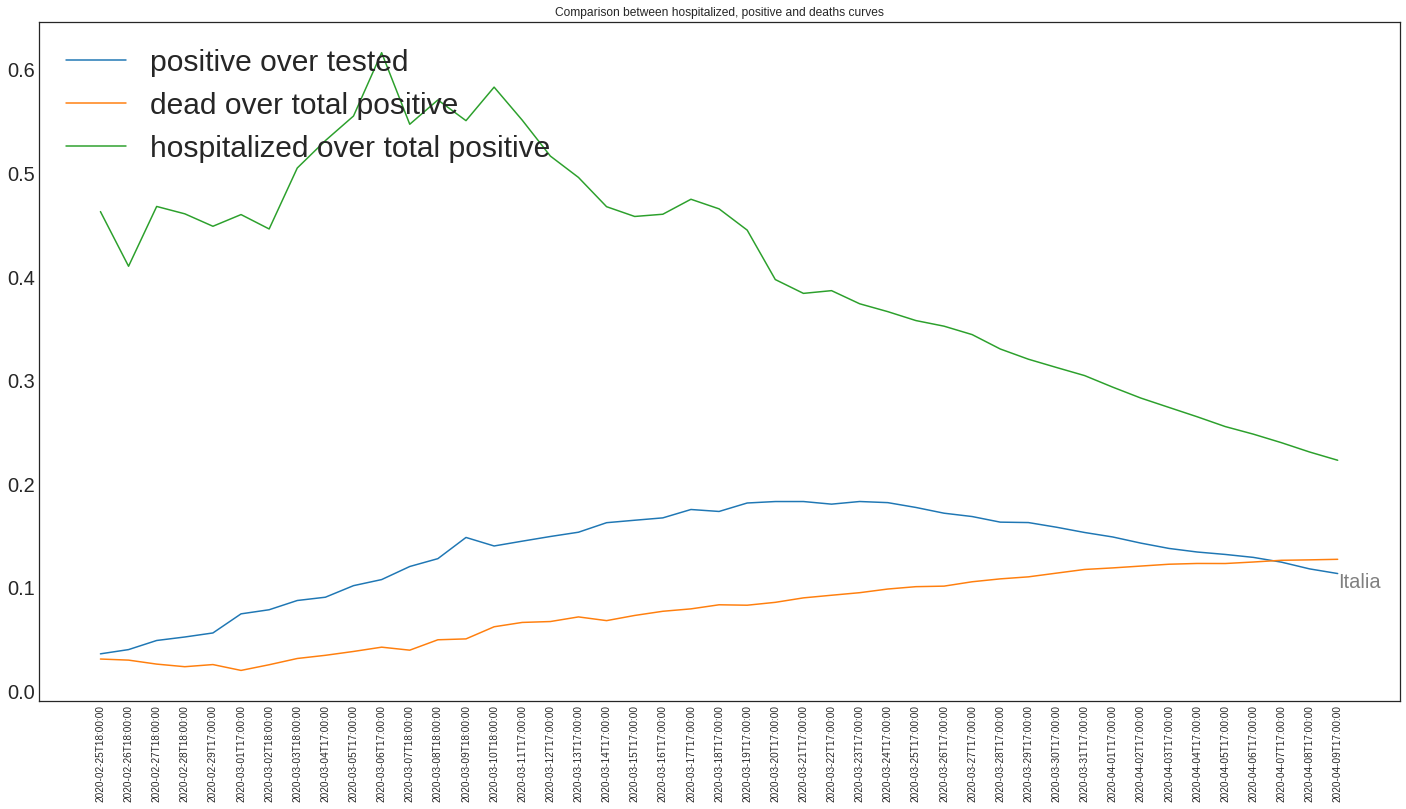

In [0]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
italy_hospitalized_vs_totalpositives = italy_hospitalized[['Italia']]/italy_total_positive[['Italia']]
italy_hospitalized_vs_totalpositives = italy_hospitalized_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested, label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives, label='dead over total positive')
ax.plot(italy_hospitalized_vs_totalpositives.index, italy_hospitalized_vs_totalpositives, label='hospitalized over total positive')
ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.rolling(window=5).mean().loc[last_day], region, **style)

ax.set_title('Comparison between hospitalized, positive and deaths curves')
ax.set_xticklabels(italy_dead_vs_totalpositives.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

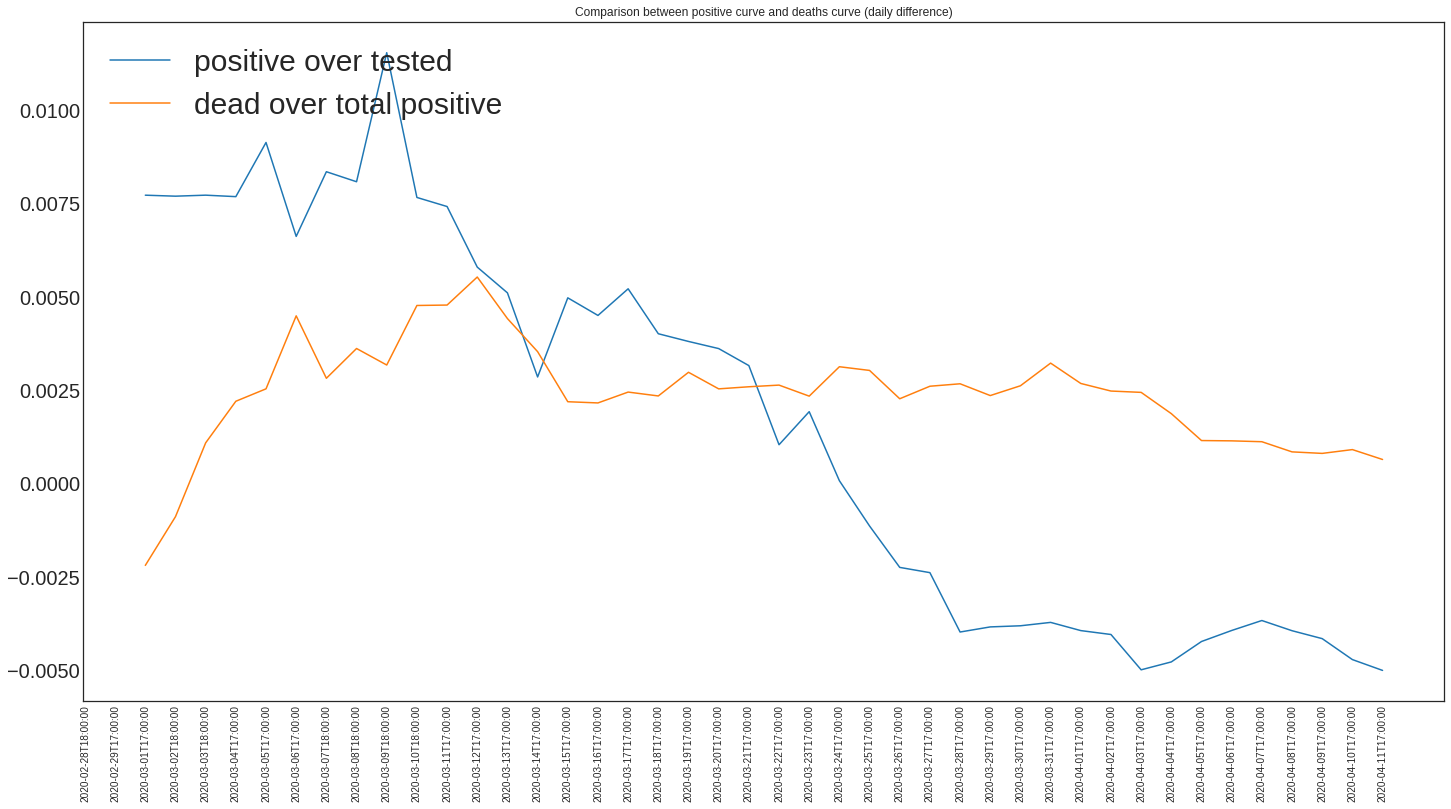

In [26]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested.diff().rolling(window=5).mean(), label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives.diff().rolling(window=5).mean(), label='dead over total positive')

ax.set_title('Comparison between positive curve and deaths curve (daily difference)')
ax.set_xticklabels(italy_dead_vs_totalpositives.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

La curva dei deceduti è per logica in ritardo rispetto al tasso di positivi ma dal grafico delle differenze giornaliere non è possibile quantificarlo.
La curva degli ospedalizzati è in discesa da molti giorni ed ha anticipato il picco dei positivi relativi (ossia i positivi rispetto ad i test effettuati).
La discesa della curva dei positivi relativi scende molto gradualmente.
